# Week 08: Scaling and polynomial features
### Introduction

In this set 8, we will not introduce new learning algorithms, but instead consider two useful tools for machine learning:

- Feature scaling
- Feature engineering: Polynomial features

To make it simple, we consider both of them in the context of (enhanced) linear regression. You should keep in mind, however, that

- They are equally relevant to classification as to regression.
- Feature scaling applies in similar ways to all learners using gradient descent.
- Polynomial features may be added to any linear learners.

To keep things even simpler, we will reuse a data set and some of the classes and methods we introduced in the exercise set week 07. We have therefore included the first half of the exercise set from week 07 here. What is new, comes from part B, below.

## From week 7: Linear and logistic regression
### Introduction

This week, we will get some first-hand experience with regression.
We will implement gradient descent for linear regression. Then we will proceed to classification, first by using linear regression and then logistic regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## NumPy
We will first familiarize ourselves a little with NumPy. A function which we will use over again is `linspace(x1,x2,N)` which makes a vector of length $N$ splitting the interval $[x1,x2]$ into equally sized intervals.

In [2]:
xx = np.linspace(-5,5,100)
xx[:10]

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909])

One of the major improvements from using NumPy is the possibilty of computing many values by applying a function to a numpy array.

In [3]:
y1 = -6*xx**3 + xx**2 -3*xx + 5

`y1`will contain the corresponding function values for each element `x`in `xx`. We may plot the result.

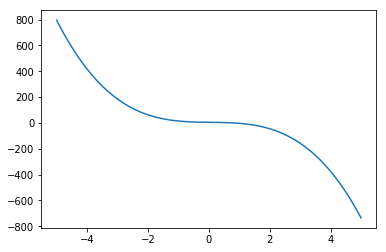

In [4]:
plt.plot(xx,y1)

## Dataset for linear regression
We will start with a smooth curve and add some "noise". The underlying idea is that the smooth curve represents the function we are looking for, and that this is the best we can hope to learn. A solution which does better  on the training material than the smooth curve is probably overfitted and will not generalize as well to new data as the smooth curve. We are using a normal distribution to generate noise. The numpy function `normal` will generate a vector of `size` many random points around `loc` from a distribution with standard deviation `scale`.

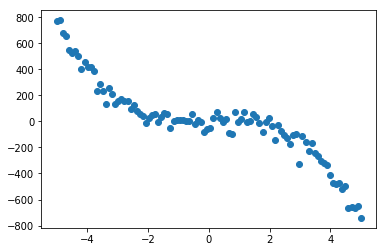

In [5]:
from numpy.random import normal
t = y1 + normal(loc=0, scale=50, size=100)
plt.scatter(xx, t)

Our training data now consist of pairs (xx[i], t[i]), where xx[i] is the datapoint and t[i] the target value. So far, both `xx` and `t` are vectors. Check their shapes, e.g., `xx.shape`. The goal is to make an implementation for linear regression which works with an arbitrary number of input variables and not just one. We will therefore transform `xx` to a matrix of dimension $M\times n$ where each row represents one datapoint, and n is the number of input variables (or features). Check the shape of `X` after the transform.

In [6]:
X = xx.reshape(-1,1)

#### Solution

In [7]:
xx.shape

(100,)

In [8]:
X.shape

(100, 1)

#### End of solution

## Part A: Linear regression

We will implement our own linear regression model. Our aim is to find an approximate function that fits the data generated above.

Since we are dealing with only one input variable, we start with a simple linear function, $f(x_1) = w_0 + w_1x_1$.

### Exercise 7.1: MSE

We wonder if our $f$ fits the data well, and what parameters will give us the best approximation. We will estimate this using the Mean Squared Error:

$\frac{1}{N} \sum_{j=1}^{N} (t_j - \sum_{i=0}^{m} w_ix_{ji})^2$

Write a function calculating MSE of our approximation.

In [9]:
# Your code here

#### solution

In [10]:
def mse(y, y_pred):
    sum_errors = 0.
    for i in range(0,len(y)):
        sum_errors += (y[i] - y_pred[i])**2
    mean_squared_error = sum_errors/len(y)
    return mean_squared_error

In [11]:
# Vector form solution
def mse_2(x,y):
    return sum((x - y)**2) /x.shape[0]

#### end of solution

### Exercise 7.2: testing the MSE
To test our implementation, we can take the function $f(x_1)=0$ as a baseline and calculate the MSE for this $f$. Also calculate the Root Means Square Error which provides a more natural measure for how good the fit is.

#### solution

In [12]:
hypothesis = np.array([0 for x in xx])
mse = mse_2(hypothesis, t)
print("MSE: ", mse)

MSE:  90588.11571793549


In [13]:
print("RMSE: ", np.sqrt(mse))

RMSE:  300.97859677713876


#### end of solution

### Exercise 7.3: Adding bias

We will implement linear regression with gradient descent and test it on the data. To make it simple, we will add a $x_0=1$ to all our datapoints, and consider $f(x_1) = w_0 + w_1x_1$ as $f(x_0, x_1) = w_0x_0+ w_1x_1$. Make a procedure that does this.

In [14]:
def add_bias(X):
    """X is a Nxm matrix: N datapoints, m features
    Return a Nx(m+1) matrix with added bias in position zero"""
    pass

#### solution

In [15]:
def add_bias(X):
    """X is a Nxm matrix: N datapoints, m features
    Return a Nx(m+1) matrix with added bias in position zero"""
    sh = X.shape
    m = sh[0]
    bias = np.ones((m,1)) # Makes a m*1 matrix of 1-s
    # Concatenate the column of bias in front of the columns of X.
    return np.concatenate((bias, X), axis  = 1) 

#### end  of solution

### Exrcise 7.4: Gradient Descent
We will implement the linear regression in a class as we did with the classifiers earlier. The fit method will run the gradient descent step a number of times to train the classifier. The predict method should take a matrix containing several data points and predict the outcome for all of them. Fill in the methods.

Assume that the matrix of training data are not extended with bias features. Hence, make adding bias a part of your methods.

After training there should be an attribute with learned coeffecients (weights) which is applied by the predict method.

In [16]:
class NumpyLinReg():

    def fit(self, X_train, t_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
    
    def predict(self, X):
        """X is a Kxm matrix for some K>=1
        predict the value for each point in X"""
        pass


#### solution

In [17]:
class NumpyLinReg():

    def fit(self, X_train, t_train, eta = 0.1, epochs=10):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        
        (N, m) = X_train.shape
        X_train = add_bias(X_train)
        
        self.weights = weights = np.zeros(m+1)
        
        for e in range(epochs):
            weights -= eta / N *  X_train.T @ (X_train @ weights - t_train)      
    
    def predict(self, X):
        """X is a Kxm matrix for some K>=1
        predict the value for each point in X"""
        Z = add_bias(X)
        return Z @ self.weights

#### end of solution

### Exercise 7.5: Train and test the model
Fit the model to the training data. Report the coefficients. Plot the line together with the observations. Calculate the RMSE. Is the result a better fit than the baseline constant function $f(x)=0$?

#### solution

In [18]:
reg = NumpyLinReg()
reg.fit(X,t, epochs=100)
print("The coefficients: ", reg.weights)

The coefficients:  [  3.46367259 -93.03215892]


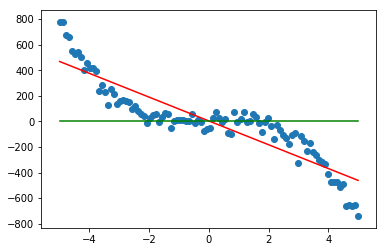

In [19]:
plt.plot(X, reg.weights[0]+reg.weights[1]*X, color="r")
plt.plot(X, [0 for i in X], 'g')

# The generated dataset
plt.scatter(X, t)

In [20]:
error = mse_2(t, add_bias(X) @ reg.weights)
print("MSE: ", error)

MSE:  16994.195337737965


In [21]:
print("RMSE :", np.sqrt(error))

RMSE : 130.36178633993154


It has improved

#### end of solution

## End of week 07

# Here starts the real set 8

## Part B: Closed form solution

(If you find this part difficult, you may skip it and move to the rest of the exercise set which does not depend on you doing this part.)

We mentioned in the lectures that the linear regression problem has a closed-form solution. Say that we have a linear regression problem where we try to predict $y$ from $x_1, x_2, \ldots,x_n$ by a linear formula  $f(\mathbf{x})=w_0+w_1x_1+\cdots+w_nx_n$ on the basis of $N$ observations of the form $(\mathbf{x}_i, t_i)$.
If we extend each observation with a bias $x_0=1$ and put the $\mathbf{x}_i$-s into a 
$(N\times(n+1))$ matrix, and the $t_i$-s into a $N\times 1$ column matrix $Y$, as we have done above, then we can find the weights (coeffecients/parameters) with the formula
$W =\theta = (X^T X)^{-1}X^TY$.
 
Some explanation to the formula. A square matrix $A$ is called the *identity matrix* if $A[i,i]=1$ for all $i$, and $A[i,j]=0$ if $i\neq j$. We use $I$ as a name of this matrix. It is called the *identity matrix* because $AI=IA=A$ for all $A$.

Given a square matrix $A$. If there exists a matrix $B$, such that $AB=BA=I$, we will say that $B$ is the *inverse* of $A$ and write this $B=A^{-1}$. Not all matrices have inverses.

In NumPy, the function `np.linalg.inv(X)` yields the inverse of `X` if it exists.

We wil not try to explain why the formula $\theta = (X^T X)^{-1}X^TY$ yields the correct solution.

### Exercise 8.1: closed form solution
Find the closed form solution to the dataset above and compare it to the solution you found by gradient descent.

#### solution

In [22]:
XX = add_bias(X)

In [23]:
beta = np.linalg.inv(XX.T @ XX) @ XX.T @ t
beta

array([  3.4637646 , -93.03215892])

We see that we get nearly the same results as with gradient descent.

#### end of solution

## Part C: Scaling the data

In the lectures, we mentioned the importance of scaling/normalizing/standardizing the data for the *k*NN algorithm. We will here consider why scaling is important for gradient descent-based algorithms. Let's see the effects of this on a practical example.

### Dataset

First, we'll load a dataset with features that intentionally vary in scale. "ex1data2.txt" (https://github.com/nex3z/machine-learning-exercise) is a dataset of housing prices, including the size of the house (in square feet), the number of bedrooms, and the price of the house in dollars.

For the record, 100 sqm is about the same as 1100 sq. feet.

In [24]:
data = np.loadtxt(open("ex1data2.txt", "r"), delimiter=",")

Let us inspect what the data looks like:

In [25]:
data[:10,:]

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05]])

The goal is to predict the price from the size and the number of bedrooms, so we start by splitting the input data from the target values.

In [26]:
X2 = data[:, 0:2]
t2 = data[:, 2]

### Exercise 8.2: Without scaling

First, let's try to fit our NumpyLinReg to the data. Experiment with various training rates and number of epochs. Print the weights (coeffecients). Try to predict the price of a 3-bedroom 1500 sq. feet house. What do you see?

#### solution

In [27]:
X2b = add_bias(X2)

In [28]:
# Closed-form solution
beta_X2 = np.linalg.inv(X2b.T @ X2b) @ X2b.T @ t2
beta_X2

array([89597.9095428 ,   139.21067402, -8738.01911233])

In [29]:
reg2 = NumpyLinReg()
reg2.fit(X2,t2 ,epochs=10)
reg2.weights

array([-3.17801472e+55, -7.34004584e+58, -1.06014599e+56])

In [30]:
for epochs in [10, 20, 50, 100, 200, 500, 1000, 10000, 100000, 1000000]:
    reg2 = NumpyLinReg()
    reg2.fit(X2, t2, epochs=epochs, eta=0.01)
    print(epochs, reg2.weights)

10 [-3.17739580e+45 -7.33861634e+48 -1.05993953e+46]
20 [-1.40992183e+92 -3.25640116e+95 -4.70332300e+92]
50 [-1.23187371e+232 -2.84517545e+235 -4.10937673e+232]
100 [nan nan nan]
200 [nan nan nan]
500 [nan nan nan]
1000 [nan nan nan]
10000 [nan nan nan]


C:\Users\jtl_adm\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


100000 [nan nan nan]
1000000 [nan nan nan]


In [31]:
for epochs in [10, 20, 50, 100, 200, 500, 1000, 10000, 100000, 1000000]:
    reg2 = NumpyLinReg()
    reg2.fit(X2,t2, epochs=epochs, eta=0.0000001)
    print(epochs, reg2.weights)

10 [8.09939922e-02 1.65047370e+02 2.54979451e-01]
20 [9.06724623e-02 1.65382111e+02 2.72059235e-01]
50 [1.19273297e-01 1.65382707e+02 3.21848901e-01]
100 [  0.16694074 165.38256699   0.40482966]
200 [  0.26227519 165.38228601   0.57078977]
500 [  0.54827499 165.38144309   1.06865874]
1000 [  1.02492944 165.38003829   1.89840257]
10000 [  9.60217488 165.35476462  16.82571588]
100000 [ 95.1113773  165.10335307 165.26025245]
1000000 [ 924.75641922  162.71718631 1568.64708271]


In [32]:
# Using the results we got from grad.desc.
house = np.array([[1500, 3]])
print("The price of a 1500 sq.ft. 3 bedroom: ", 
      reg2.predict(house)[0])

The price of a 1500 sq.ft. 3 bedroom:  249706.47713092354


In [33]:
## Using the closed-form solution
print("The price of a 1500 sq.ft. 3 bedroom: ", 
     beta_X2[0]+1500*beta_X2[1]+3*beta_X2[2] )

The price of a 1500 sq.ft. 3 bedroom:  272199.86323225044


We see that, in order to not run into problems, we have to use a small training rate and run many epochs. Even after a long training time, the results are far from optimal.

#### end of solution

### Exercise 8.3: Scaling

The reason for our problems is the large difference in scale between our two input features -- 3 orders of magnitude. A good idea could be to scale the data before you start to experiment. Implement a max-min scaler and scale your data. By the way, it is only the input data `X2` which have to be scaled. It is normally not necessary to scale the output values `t2`/`y`.

#### solution

In [34]:
class MMScaler():
    
    def fit(self, X_train):
        self.maxes = np.max(X_train, axis=0)
        self.mins = np.min(X_train, axis=0)
    
    def transform(self, X):
        return (X - self.mins)/(self.maxes - self.mins)

In [35]:
sc = MMScaler()
sc.fit(X2)

In [36]:
X2_scaled = sc.transform(X2)

#### end of solution

### Exercise 8.4: With scaling
Try to fit a linear regression to the scaled data. Experiment with various training rates and number of epochs. Print the weights (coeffecients). Try to predict the price of a 3-bedroom 1500 sq. feet house. How does this go compared to the experiments without scaling?

#### solution

In [37]:
for epochs in [10, 20, 50, 100, 200, 500, 1000, 10000, 100000]:
    reg2s = NumpyLinReg()
    reg2s.fit(X2_scaled, t2, epochs=epochs, eta=0.1)
    print(epochs, reg2s.weights)

10 [186300.34961518  78510.10902503 108201.85774339]
20 [223293.41814086 106022.21389387 132136.93324161]
50 [222089.43817947 147049.96671846 139033.64931573]
100 [205529.39998004 199801.47887057 137165.90585168]
200 [184768.94099656 278760.75601805 126744.90900462]
500 [170924.74693279 399387.5457347   79030.62275284]
1000 [182840.27702204 465664.56383493  18084.82854105]
10000 [199467.37901081 504777.89195151 -34952.05912129]
100000 [199467.38469348 504777.9039879  -34952.0764493 ]


In [38]:
house = np.array([1500, 3])
print("The price of a 1500 sq.ft. 3 bedroom: ", 
      reg2s.predict(sc.transform([house]).reshape(1,-1))[0])

The price of a 1500 sq.ft. 3 bedroom:  272199.8632322531


In [39]:
for epochs in range(100, 1100, 100):
    reg2s = NumpyLinReg()
    reg2s.fit(X2_scaled, t2, epochs=epochs, eta=1.0)
    print(epochs, reg2s.weights)

100 [182951.24478162 466309.1986353   17500.81249038]
200 [196201.25935461 497836.52529658 -24978.71587661]
300 [198853.64610288 503477.7958823  -33080.52718119]
400 [199352.26199    504534.06327696 -34601.03560532]
500 [199445.79180043 504732.16840188 -34886.23388371]
600 [199463.33464992 504769.32565209 -34939.72677289]
700 [199466.62505227 504776.29500339 -34949.76009813]
800 [199467.24221236 504777.6022008  -34951.64198588]
900 [199467.3579692  504777.8473836  -34951.99495974]
1000 [199467.37968098 504777.893371   -34952.06116482]


In [40]:
    reg2s = NumpyLinReg()
    reg2s.fit(X2_scaled, t2, epochs=500, eta=1.0)
    print(epochs, reg2s.weights)

1000 [199445.79180043 504732.16840188 -34886.23388371]


In [41]:
house = np.array([1500, 3])
print("The price of a 1500 sq.ft. 3 bedroom: ", 
      reg2s.predict(sc.transform([house]).reshape(1,-1))[0])

The price of a 1500 sq.ft. 3 bedroom:  272203.01824645116


We see that we reach  near perfect result already with 5000 epochs and a learning rate of 0.1 or 500 epochs and a learning rate of 1.0.

#### end of solution

## Part D: Polynomial features
We return to our first dataset, (X,t) from exercise set week07. We tried to fit a straight line to our dataset. From the way the set was generated, we think we would get a better fit if we try to predict a polynomial. We will now try to fit a polynomial. One way of achieving this is to extend our dataset with more features corresponding to the polynomial.

We can add features for $x^2$, $x^3$, $x^4$, $x^5$, etc. to the data set. Since the resulting features will have different scales, after adding the polynomial features, we should scale all the features (except the bias, of course). Then we can try to fit a linear expression (a hyperplane) to the data. 

### Exercise 8.5
Add features for $x^2$ and $x^3$. Scale the data. Fit a linear regression model to the data. Calculate the MSE. Compare to the MSE for the linear model. Plot the polynomial together with the dataset.

#### solution

In [42]:
X_poly_3 = np.concatenate([X, X**2, X**3], axis=1)

In [43]:
poly_scaler = MMScaler()
poly_scaler.fit(X_poly_3)
X_p3s = poly_scaler.transform(X_poly_3)

In [44]:
for epochs in [10, 20, 50, 100, 200, 500, 1000,10000, 100000, 1000000]:
    regp = NumpyLinReg()
    regp.fit(X_p3s, t, epochs=epochs, eta=1.0)
    print(epochs, regp.weights)

10 [ 290.92374085 -391.19132941   68.10829029 -269.60321564]
20 [ 441.24966992 -534.55436999   61.86661679 -403.10030315]
50 [ 579.97057513 -575.30460105   19.6016559  -594.57940321]
100 [ 628.23372276 -469.79105546    8.5349763  -786.82531349]
200 [  678.21433175  -296.13019549     7.33919487 -1059.15496084]
500 [  745.55087786   -59.63379016     6.23684088 -1429.00267739]
1000 [  768.48578829    20.91774215     5.86149629 -1554.97392737]
10000 [  771.58353771    31.79759552     5.81079962 -1571.9884855 ]
100000 [  771.58353771    31.79759552     5.81079962 -1571.9884855 ]
1000000 [  771.58353771    31.79759552     5.81079962 -1571.9884855 ]


In [45]:
for epochs in range(1000, 11000, 1000):
    regp = NumpyLinReg()
    regp.fit(X_p3s, t, epochs=epochs, eta=1.0)
    print(epochs, regp.weights)

1000 [  768.48578829    20.91774215     5.86149629 -1554.97392737]
2000 [  771.53967436    31.64353956     5.81151748 -1571.74756367]
3000 [  771.58291662    31.79541413     5.81080979 -1571.9850741 ]
4000 [  771.58352892    31.79756463     5.81079977 -1571.98843719]
5000 [  771.58353759    31.79759509     5.81079963 -1571.98848481]
6000 [  771.58353771    31.79759552     5.81079962 -1571.98848549]
7000 [  771.58353771    31.79759552     5.81079962 -1571.9884855 ]
8000 [  771.58353771    31.79759552     5.81079962 -1571.9884855 ]
9000 [  771.58353771    31.79759552     5.81079962 -1571.9884855 ]
10000 [  771.58353771    31.79759552     5.81079962 -1571.9884855 ]


In [46]:
    regp = NumpyLinReg()
    regp.fit(X_p3s, t, epochs=3000, eta=1.0)
    print(epochs, regp.weights)

10000 [  771.58291662    31.79541413     5.81080979 -1571.9850741 ]


In [47]:
error = mse_2(t,regp.predict(X_p3s) )
print("MSE: ", error)

MSE:  2013.5044770529278


In [48]:
print("RMSE: ", error**0.5)

RMSE:  44.87209017922976


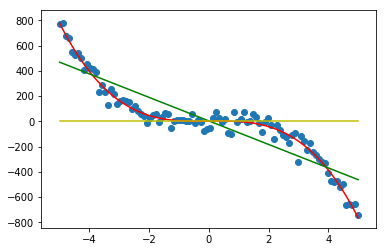

In [49]:
plt.plot(X, regp.predict(X_p3s), color="r")
plt.plot(X, reg.weights[0]+reg.weights[1]*X, color="g")
plt.plot(X, [0 for i in X], 'y')
# The generated dataset
plt.scatter(X, t)